# CAVEAT
The following instruction **does not work for 3D plots**:
```
ax.set_aspect(aspect = 'equal')
```

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from skimage import io

# Allow the interactive rotation of 3D scatter plots in jupyter notebook
import sys    
import os    
file_name =  os.path.basename(sys.argv[0])
#print(file_name == 'ipykernel_launcher.py') # This basicaly asks whether this file is a jupyter notebook?
if __name__ == "__main__":
    if file_name == 'ipykernel_launcher.py': # Run only in .ipynb, not in exported .py scripts
        get_ipython().run_line_magic('matplotlib', 'notebook') # Equivalent to ''%matplotlib notebook', but it is also understood by .py scripts
        
import functions_data_processing    
from functions_data_processing import load_camera_params, get_variables_from_vertex_full_Dataframe, load_faces
import functions_plot
from functions_plot import plot_camera_and_vertices

height, width, channels: (540, 960, 4)


In [2]:
print('Image size:')
functions_data_processing.get_picture_size(verbose=1)

Image size:
height, width, channels: (540, 960, 4)


(540, 960, 4)

# DataSet: RendersTowelWall7 (17/12/18)
Towel Wall hang from different places, where a subsample of vertices is chosen. 

# Choose number of vertices in each direction

In [3]:
submesh_num_vertices_horizontal = 8
submesh_num_vertices_vertical = 12

from submesh import submesh_idx_from_num_vertices_in_each_direction
submesh_idx = submesh_idx_from_num_vertices_in_each_direction(submesh_num_vertices_vertical = submesh_num_vertices_vertical,
                                                              submesh_num_vertices_horizontal = submesh_num_vertices_horizontal)
print(submesh_idx)

[0, 15, 29, 44, 58, 73, 87, 102, 515, 530, 544, 559, 573, 588, 602, 617, 927, 942, 956, 971, 985, 1000, 1014, 1029, 1442, 1457, 1471, 1486, 1500, 1515, 1529, 1544, 1957, 1972, 1986, 2001, 2015, 2030, 2044, 2059, 2369, 2384, 2398, 2413, 2427, 2442, 2456, 2471, 2884, 2899, 2913, 2928, 2942, 2957, 2971, 2986, 3296, 3311, 3325, 3340, 3354, 3369, 3383, 3398, 3811, 3826, 3840, 3855, 3869, 3884, 3898, 3913, 4326, 4341, 4355, 4370, 4384, 4399, 4413, 4428, 4738, 4753, 4767, 4782, 4796, 4811, 4825, 4840, 5253, 5268, 5282, 5297, 5311, 5326, 5340, 5355]


In [4]:
###
### 3rd DataSet - RendersTowelWall3
###
# Choose sequence, animation frame and order of vertices
sequence_name = 'TowelWall'
dataset_number = '7'
group_number = '001'
animation_frame = '00022'
# animation_frame = '00001'
reordered=1

# Load camera parameters
variables = load_camera_params(sequence_name = sequence_name, dataset_number = dataset_number)
RT_matrix = variables['RT_matrix']
RT_extended = variables['RT_extended']
camera_worldCoord_x = variables['camera_worldCoord_x']
camera_worldCoord_y = variables['camera_worldCoord_y']
camera_worldCoord_z = variables['camera_worldCoord_z']
Intrinsic_matrix = variables['Intrinsic_matrix']
Camera_proj_matrix = variables['Camera_proj_matrix']

# Load vertex data
variables = get_variables_from_vertex_full_Dataframe(sequence_name=sequence_name, dataset_number=dataset_number, 
                                                     group_number=group_number, animation_frame=animation_frame,
                                                     RT_extended=RT_extended, reordered=reordered,
                                                     submesh_idx=submesh_idx, verbose=1)

occlusion_mask_values = variables['occlusion_mask_values']
u = variables['u']
v = variables['v']
u_visible = variables['u_visible']
v_visible = variables['v_visible']
u_occluded = variables['u_occluded']
v_occluded = variables['v_occluded']
X_world = variables['X_world']
Y_world = variables['Y_world']
Z_world = variables['Z_world']
X_camera = variables['X_camera']
Y_camera = variables['Y_camera']
Z_camera = variables['Z_camera']
nX_world = variables['nX_world']
nY_world = variables['nY_world']
nZ_world = variables['nZ_world']

# Load face data
faces = load_faces(sequence_name = sequence_name, dataset_number = dataset_number, verbose=1, reordered = reordered)

   occluded    u    v          d         x         y         z        nx  \
0         0  312  152  12.014502 -1.932211 -0.167527  2.809879 -0.866536   
1         0  315  151  12.031223 -1.901170 -0.150806  2.826915 -1.098661   
2         1  318  149  12.042937 -1.871188 -0.139092  2.849206 -0.334370   
3         1  321  149  12.030190 -1.834617 -0.151839  2.843412  1.601038   
4         1  321  151  12.005157 -1.821572 -0.176871  2.816779  1.898456   

         ny        nz  
0  0.749731  3.114691  
1  0.657374  3.234347  
2  0.564391  3.681328  
3  0.193420  3.487834  
4  0.056940  3.230322  

Number of vertices = 96
Number of faces = 20808


## Showing the 2D animation frame

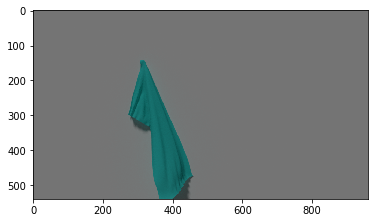

In [5]:
functions_plot.show_2D_animation_frame(sequence_name, dataset_number, group_number, animation_frame)

## 3D scatter plot of the vertices
(in world coordinates)

xlim: -2.503115 -0.142053
ylim: -0.99646685 0.02087585
zlim: -1.8102280999999998 3.0516641


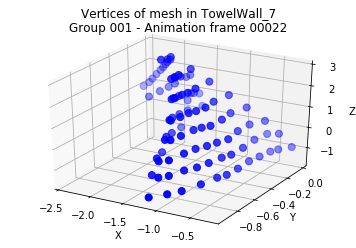

In [6]:
xmin, ymin, zmin, xmax, ymax, zmax= functions_plot.plot_3D_vertices(X=X_world, Y=Y_world, Z=Z_world, sequence_name=sequence_name,
                        dataset_number=dataset_number, 
                        group_number=group_number, 
                        animation_frame=animation_frame)

## Plot the normal vectors to the mesh at the vertices
You can choose between world/camera coordinates
and whether to plot the camera position as well.

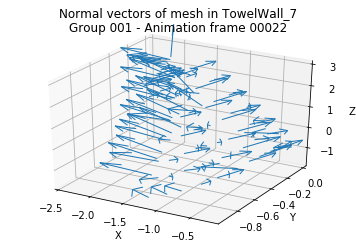

In [7]:
functions_plot.plot_normal_vectors(sequence_name=sequence_name,
                        dataset_number=dataset_number, 
                        group_number=group_number, 
                        animation_frame=animation_frame, 
                        X=X_world, Y=Y_world, Z=Z_world,
                        nX=nX_world, nY=nY_world, nZ=nZ_world,
                        occlusion_mask_values=occlusion_mask_values,
                        camera_x=camera_worldCoord_x,
                        camera_y=camera_worldCoord_y,
                        camera_z=camera_worldCoord_z,
                        xmin=xmin, ymin=ymin, zmin=zmin, xmax=xmax, ymax=ymax, zmax=zmax,
                        plot_camera=1, swap_axes=0)

## 3D scatter plot of the vertices coloured by visibility
(in world coordinates)

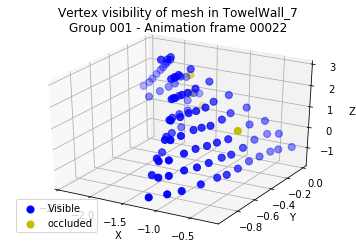

In [8]:
# 3D scatter plot of the vertices coloured by visibility
# (with legend)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

unique = list(set(occlusion_mask_values))
#colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
colors= ['b', 'y']
for i, un in enumerate(unique):
    xi = [X_world[j] for j  in range(len(X_world)) if occlusion_mask_values[j] == un]
    yi = [Y_world[j] for j  in range(len(Y_world)) if occlusion_mask_values[j] == un]
    zi = [Z_world[j] for j  in range(len(Z_world)) if occlusion_mask_values[j] == un]

    ax.scatter(xi, yi, zi, c=colors[i], marker='o', s=50)

ax.legend(['Visible', 'occluded'], loc=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Vertex visibility of mesh in ' + sequence_name + '_' + dataset_number + '\nGroup ' + group_number + ' - Animation frame ' + animation_frame)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])

#ax.set_aspect(aspect = 'equal')

plt.show()

# fig.savefig('VisualizationTest/vertex_visibility_' + sequence_name + dataset_number + '_Group' + group_number + '_frame' + animation_frame + '.png')

## Plot camera position and 3D scatter plot the vertices coloured by visibility
(in world coordinates)

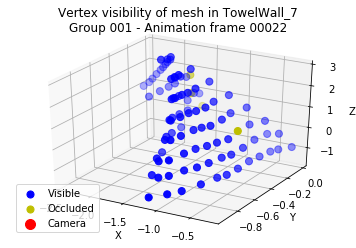

In [9]:
# 3D scatter plot of the vertices coloured by visibility
# Including camera position

# plot_camera_and_vertices(X=X_world, Y=Y_world, Z=Z_world, vertex_size=50)

plot_camera_and_vertices(sequence_name=sequence_name,
                             dataset_number=dataset_number, 
                             group_number=group_number, 
                             animation_frame=animation_frame, 
                             X=X_world, Y=Y_world, Z=Z_world,
                             occlusion_mask_values=occlusion_mask_values,
                             camera_x=camera_worldCoord_x,
                             camera_y=camera_worldCoord_y,
                             camera_z=camera_worldCoord_z,
                             xmin=xmin, ymin=ymin, zmin=zmin, xmax=xmax, ymax=ymax, zmax=zmax,
                             swap_axes=0,
                             vertex_size=50)

## 2D scatter plot of the pixel location of each vertex
Using both visible and occluded vertices

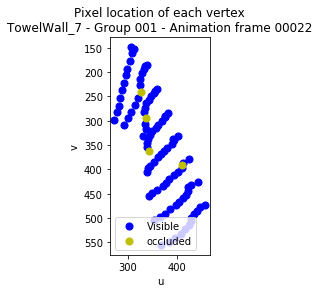

In [10]:
# 2D scatter plot of the pixel location of each vertex
# Using both visible and occluded vertices

functions_plot.plot_uv_on_RGB(u_visible=u_visible, v_visible=v_visible, 
                                      u_occluded=u_occluded, v_occluded=v_occluded,
                                      sequence_name=sequence_name, dataset_number=dataset_number, 
                                      group_number=group_number, animation_frame=animation_frame)

## 2D scatter plot of the pixel location of each vertex
Using only visible vertices

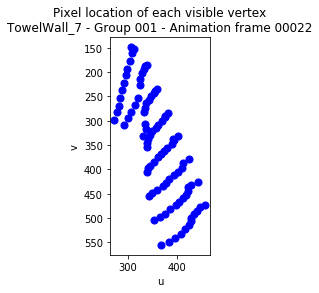

In [11]:
# 2D scatter plot of the pixel location of each vertex
# Using only visible vertices

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(u_visible, v_visible, c='b', marker='o', s=50)

plt.gca().invert_yaxis() # the origin of the (u, v) coordinates is top-left

ax.set_xlabel('u')
ax.set_ylabel('v')

plt.title('Pixel location of each visible vertex\n' + sequence_name + '_' + dataset_number + ' - Group ' + group_number + ' - Animation frame ' + animation_frame)

ax.set_aspect(aspect = 'equal')

plt.show()

fig.savefig('VisualizationTest/pixelLocationOfVisibleVertices_' + sequence_name + dataset_number + '_Group' + group_number + '_frame' + animation_frame + '.png')

## Plot RGB and landmaks

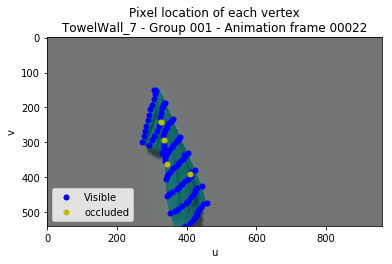

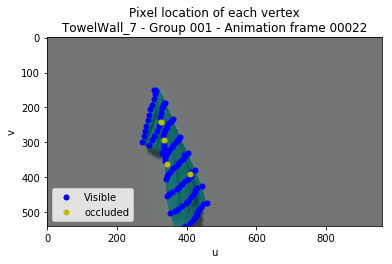

In [12]:
functions_plot.plot_RGB_and_landmarks(u_visible=u_visible, v_visible=v_visible, 
                                      u_occluded=u_occluded, v_occluded=v_occluded,
                                      sequence_name=sequence_name, dataset_number=dataset_number, 
                                      group_number=group_number, animation_frame=animation_frame)

# Normalize 0<=u,v<=1

In [13]:
print(u)
u, v = functions_data_processing.normalize_uv_01(u=u, v=v)
print(u)
u, v = functions_data_processing.unnormalize_uv_01(u=u, v=v)
print(u)

[312 339 360 382 403 425 443 459 307 335 356 376 393 413 429 448 308 333
 353 376 394 410 423 441 305 329 347 369 390 411 423 436 299 325 343 362
 381 403 419 430 296 324 338 357 374 395 412 429 292 326 334 350 368 385
 405 425 288 320 333 345 362 379 398 417 284 314 336 341 353 372 386 408
 281 306 334 339 345 359 376 396 278 300 336 339 342 350 366 384 272 292
 330 343 340 343 353 368]
[0.325      0.353125   0.375      0.39791667 0.41979167 0.44270833
 0.46145833 0.478125   0.31979167 0.34895833 0.37083333 0.39166667
 0.409375   0.43020833 0.446875   0.46666667 0.32083333 0.346875
 0.36770833 0.39166667 0.41041667 0.42708333 0.440625   0.459375
 0.31770833 0.34270833 0.36145833 0.384375   0.40625    0.428125
 0.440625   0.45416667 0.31145833 0.33854167 0.35729167 0.37708333
 0.396875   0.41979167 0.43645833 0.44791667 0.30833333 0.3375
 0.35208333 0.371875   0.38958333 0.41145833 0.42916667 0.446875
 0.30416667 0.33958333 0.34791667 0.36458333 0.38333333 0.40104167
 0.421875   0.4427

In [14]:
filename = 'Renders' + sequence_name + dataset_number + '/Group.' + group_number 
filename += '/vertices_' + animation_frame
if reordered == 1:
    filename+= '_reordered'
filename+='.txt'
f = open(filename, 'r')
line1 = f.readline()
df_vertices_all_data = pd.read_csv(f, sep = ' ',  names = line1.replace('# ', '').split())

#
# Select the submesh only
#
if submesh_idx!=None:
    df_vertices_all_data = df_vertices_all_data.ix[submesh_idx]

# Normalize
uv = df_vertices_all_data[['u', 'v']].values
uv_original=uv
uv = functions_data_processing.normalize_uv_01(uv=uv)

# Unnormalize
uv = functions_data_processing.unnormalize_uv_01(uv=uv)
print(uv_original==uv)

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  T